# Preparing data

In [0]:
from tensorflow import keras

In [0]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [11]:
import numpy as np
x_train = train_images.reshape(60000, 28, 28, 1)
x_test = test_images.reshape(10000, 28, 28, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

(60000, 28, 28)
(10000, 28, 28)


In [0]:
from keras.utils.np_utils import to_categorical
 
y_train = to_categorical(train_labels, 10)
y_test = to_categorical(test_labels, 10)

In [0]:
x_val = x_train[-10000:]
x_train = x_train[:-10000]

y_val = y_train[-10000:]
y_train = y_train[:-10000]

In [0]:
from tensorflow.python.keras import layers
from tensorflow.python.keras import models

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [0]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 48s 954us/sample - loss: 0.2067 - acc: 0.9350 - val_loss: 0.0808 - val_acc: 0.9767
Epoch 2/5
50000/50000 [==============================] - 48s 958us/sample - loss: 0.0527 - acc: 0.9835 - val_loss: 0.0459 - val_acc: 0.9866
Epoch 3/5
50000/50000 [==============================] - 48s 958us/sample - loss: 0.0361 - acc: 0.9887 - val_loss: 0.0769 - val_acc: 0.9787
Epoch 4/5
50000/50000 [==============================] - 48s 966us/sample - loss: 0.0277 - acc: 0.9912 - val_loss: 0.0346 - val_acc: 0.9900
Epoch 5/5
50000/50000 [==============================] - 48s 964us/sample - loss: 0.0214 - acc: 0.9931 - val_loss: 0.0483 - val_acc: 0.9886


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0407 - accuracy: 0.9884


# SHAP

In [14]:
!pip install shap
import shap
import numpy as np

     |████████████████████████████████| 276kB 3.5MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394118 sha256=f9b8362968e5f932ea2714cf87912d2302ab1b236e862d7dbe3f782d6f334de3
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [0]:
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

In [16]:
e = shap.DeepExplainer(model, background)

keras is no longer supported, please use tf.keras instead.


In [0]:
shap_values = e.shap_values(x_test[0:5])

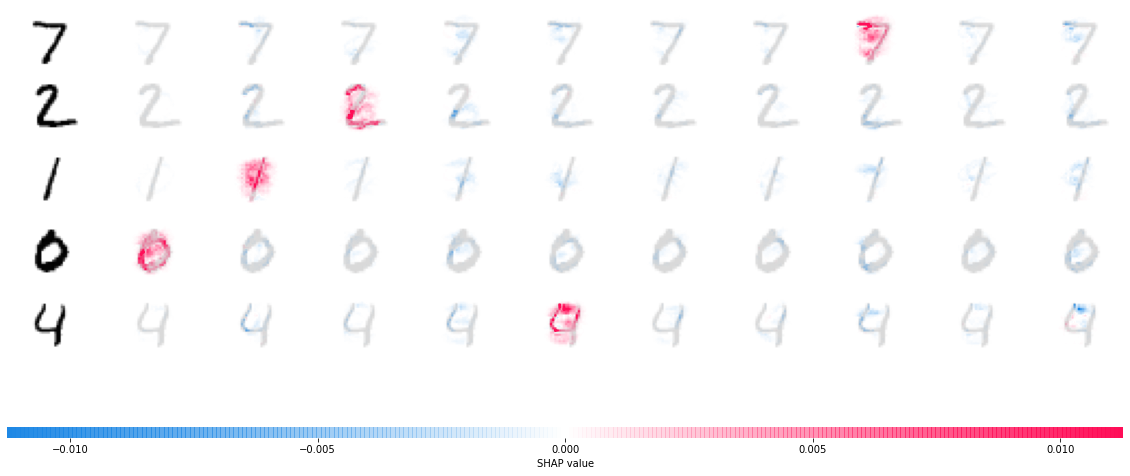

In [23]:
shap.image_plot(shap_values, -x_test[0:5])

# CEM

In [24]:
!pip install alibi

     |████████████████████████████████| 153kB 3.4MB/s 
     |████████████████████████████████| 51kB 4.0MB/s 
     |████████████████████████████████| 110.5MB 71kB/s 
     |████████████████████████████████| 204kB 23.7MB/s 
     |████████████████████████████████| 921kB 41.9MB/s 
     |████████████████████████████████| 3.8MB 43.1MB/s 
     |████████████████████████████████| 512kB 34.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=85c1619e946dc9a49ae31f8b0a564f91fdba9d4798fb71fa0befd3642ac52f2a
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled

In [0]:
from keras.datasets import mnist
import numpy as np
 
(x_train, _), (x_test, _) = mnist.load_data()
 
x_train = x_train.astype('float32') / 255. 
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
 
x_test = x_test.astype('float32') / 255.
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [20]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
 
input_img = Input(shape=(28, 28, 1)) 
 
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
 
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
 
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='Adadelta',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))
 
decoded_imgs = autoencoder.predict(x_test)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.2092 - accuracy: 0.7929 - val_loss: 0.1664 - val_accuracy: 0.7918
Epoch 2/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.1564 - accuracy: 0.7988 - val_loss: 0.1484 - val_accuracy: 0.7973
Epoch 3/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.1434 - accuracy: 0.8026 - val_loss: 0.1380 - val_accuracy: 0.7996
Epoch 4/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.1350 - accuracy: 0.8049 - val_loss: 0.1343 - val_accuracy: 0.8088
Epoch 5/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.1297 - accuracy: 0.8064 - val_loss: 0.1257 - val_accuracy: 0.8092
Epoch 6/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.1259 - accuracy: 0.8073 - val_loss: 0.1222 - val_accuracy: 0.8090
Epoch 7/10
60000/60000 [==============================] - 90s 2ms/s

In [0]:
idx = 50
X = x_test[idx].reshape((1,) + x_test[idx].shape)

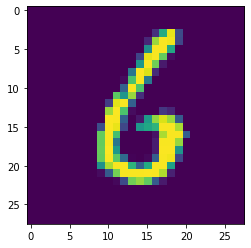

In [55]:
import matplotlib.pyplot as plt

plt.imshow(X.reshape(28, 28));

In [56]:
model.predict(X).argmax(), model.predict(X).max()

(6, 0.9999999)

In [0]:
mode = 'PN'  # Pertinent Negative
shape = (1,) + x_train.shape[1:]  
kappa = 0.  

beta = .1  
gamma = 100  
c_init = 1. 

max_iterations = 1000  
feature_range = (x_train.min(),x_train.max())  
clip = (-1000.,1000.)  
lr = 1e-2 
no_info_val = -1.

In [0]:
from alibi.explainers import CEM

cem = CEM(model, mode, shape, kappa=kappa, beta=beta, feature_range=feature_range,
          gamma=gamma, ae_model=autoencoder, max_iterations=max_iterations,
          c_init=c_init, c_steps=c_steps, learning_rate_init=lr, clip=clip, no_info_val=no_info_val)

explanation = cem.explain(X)

Pertinent negative prediction: 0


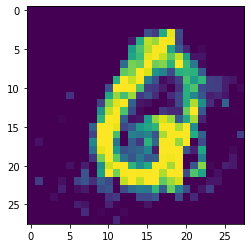

In [59]:
print('Pertinent negative prediction: {}'.format(explanation.PN_pred))
plt.imshow(explanation.PN.reshape(28, 28));

In [0]:
mode = 'PP' # Pertinent Positive

In [0]:
cem = CEM(model, mode, shape, kappa=kappa, beta=beta, feature_range=feature_range,
          gamma=gamma, ae_model=autoencoder, max_iterations=max_iterations,
          c_init=c_init, c_steps=c_steps, learning_rate_init=lr, clip=clip, no_info_val=no_info_val)

explanation = cem.explain(X)

Pertinent positive prediction: 6


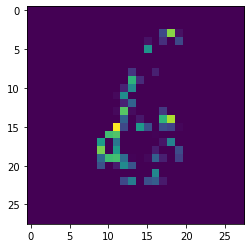

In [62]:
print('Pertinent positive prediction: {}'.format(explanation.PP_pred))
plt.imshow(explanation.PP.reshape(28, 28));

# LIME

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import gray2rgb, rgb2gray, label2rgb

In [0]:
from sklearn import datasets
mnist = datasets.fetch_openml('mnist_784')

X_vec = np.stack([gray2rgb(iimg) for iimg in mnist.data.reshape((-1, 28, 28))],0)
y_vec = mnist.target.astype(np.uint8)

In [0]:
X_vec = X_vec.astype('float32')/255.

Text(0.5, 1.0, 'Digit: 5')

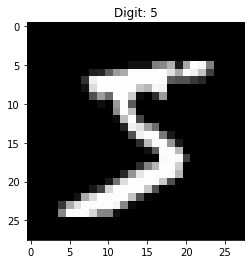

In [162]:
fig, ax1 = plt.subplots(1,1)
ax1.imshow(X_vec[0], interpolation = 'none')
ax1.set_title('Digit: {}'.format(y_vec[0]))

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer

class PipeStep(object):
    """
    Wrapper for turning functions into pipeline transforms (no-fitting)
    """
    def __init__(self, step_func):
        self._step_func=step_func
    def fit(self,*args):
        return self
    def transform(self,X):
        return self._step_func(X)


makegray_step = PipeStep(lambda img_list: [rgb2gray(img) for img in img_list])
flatten_step = PipeStep(lambda img_list: [img.ravel() for img in img_list])

simple_rf_pipeline = Pipeline([
    ('Make Gray', makegray_step),
    ('Flatten Image', flatten_step),
    ('RF', RandomForestClassifier())
                              ])

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vec, y_vec,
                                                    train_size=0.55)

In [165]:
simple_rf_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('Make Gray', <__main__.PipeStep object at 0x7f4af1d53278>),
                ('Flatten Image', <__main__.PipeStep object at 0x7f4af1d539e8>),
                ('RF',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=F

In [84]:
!pip install lime

In [0]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
explainer = lime_image.LimeImageExplainer(verbose = False)
segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=200, ratio=0.2)

In [0]:
imageID = 100

In [175]:
explanation = explainer.explain_instance(X_test[imageID], 
                                         classifier_fn = simple_rf_pipeline.predict_proba, 
                                         top_labels=10, hide_color=0, num_samples=10000, segmentation_fn=segmenter)

Text(0.5, 1.0, 'Positive/Negative Regions for 6')

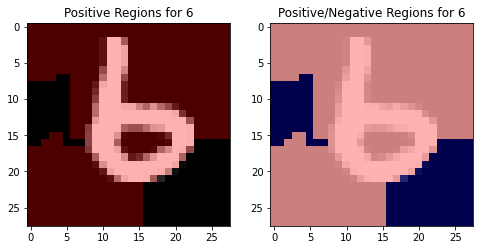

In [176]:

temp, mask = explanation.get_image_and_mask(y_test[imageID], positive_only=True, num_features=10, hide_rest=False, min_weight = 0.01)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(y_test[imageID]))
temp, mask = explanation.get_image_and_mask(y_test[imageID], positive_only=False, num_features=10, hide_rest=False, min_weight = 0.01)
ax2.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(y_test[imageID]))

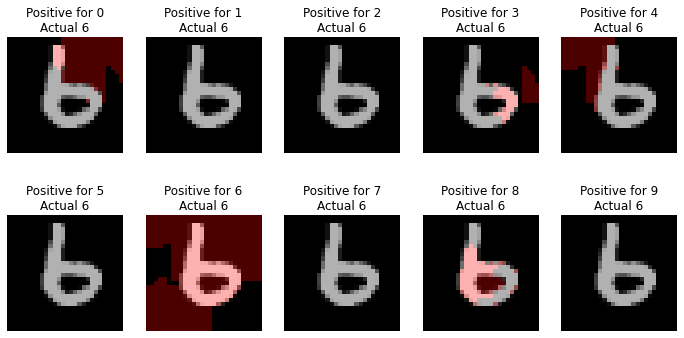

In [177]:
fig, m_axs = plt.subplots(2,5, figsize = (12,6))
for i, c_ax in enumerate(m_axs.flatten()):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=1000, hide_rest=False, min_weight = 0.01 )
    c_ax.imshow(label2rgb(mask,X_test[imageID], bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nActual {}'.format(i, y_test[imageID]))
    c_ax.axis('off')

In [212]:
pipe_pred_test = simple_rf_pipeline.predict(X_test)
wrong_idx = np.random.choice(np.where(pipe_pred_test!=y_test)[0])
print('Using #{} where the label was {} and the pipeline predicted {}'.format(wrong_idx, y_test[wrong_idx], pipe_pred_test[wrong_idx]))

Using #23290 where the label was 3 and the pipeline predicted 0


In [213]:
explanation = explainer.explain_instance(X_test[wrong_idx], 
                                         classifier_fn = simple_rf_pipeline.predict_proba, 
                                         top_labels=10, hide_color=0, num_samples=10000, segmentation_fn=segmenter)

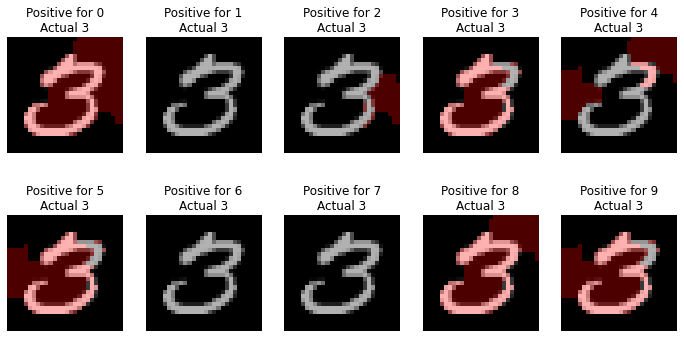

In [214]:
fig, m_axs = plt.subplots(2,5, figsize = (12,6))
for i, c_ax in enumerate(m_axs.flatten()):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=10, hide_rest=False, min_weight = 0.01 )
    c_ax.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nActual {}'.format(i, y_test[wrong_idx]))
    c_ax.axis('off')